<a href="https://colab.research.google.com/github/Rushikesh419/Machine-learning/blob/main/image_quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.image as mpimg

In [6]:
image_array=mpimg.imread('/content/palm_trees.jpg')

In [10]:
image_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [11]:
image_array.shape

(1401, 934, 3)

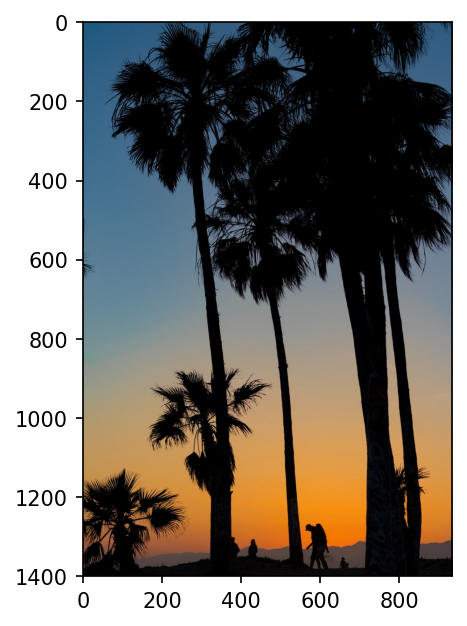

In [13]:
plt.figure(dpi=150)
plt.imshow(image_array)

In [14]:
# (H,W,C) convert 3D into 2D



In [16]:
(h,w,c)=image_array.shape

In [17]:
h

1401

In [18]:
w

934

In [19]:
c

3

In [20]:
image_2d_array=image_array.reshape(h*w,c)

In [21]:
image_2d_array

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [23]:
len(image_2d_array.shape)

2

In [24]:
from sklearn.cluster import KMeans

In [25]:
model=KMeans(n_clusters=6)


In [26]:
labels=model.fit_predict(image_2d_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
labels

array([5, 5, 5, ..., 1, 1, 1], dtype=int32)

In [28]:
model.cluster_centers_

array([[136.82331401, 143.76282594, 143.89456654],
       [  2.77058309,   2.57124563,   3.68132513],
       [218.9928282 , 135.65641108,  47.38332267],
       [ 67.35721379,  61.68101759,  61.9510675 ],
       [191.31149013, 154.49773586, 109.7555489 ],
       [ 71.33451588, 109.28411433, 137.56015178]])

In [30]:
rgb_cods=model.cluster_centers_.round(0).astype(int)

In [31]:
rgb_cods

array([[137, 144, 144],
       [  3,   3,   4],
       [219, 136,  47],
       [ 67,  62,  62],
       [191, 154, 110],
       [ 71, 109, 138]])

In [32]:
rgb_cods[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [33]:
quantize_image=np.reshape(rgb_cods[labels],(h,w,c))

In [34]:
quantize_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

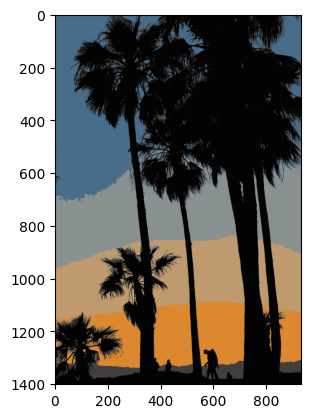

In [35]:
plt.imshow(quantize_image)